### 1. Code Enforcement

In [ ]:
!pip install webdriver-manager
!pip install selenium

In [3]:
%config Completer.use_jedi = False

#### 1.1. Install Dependencies

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import os, time, random, pandas as pd 
from bs4 import BeautifulSoup as bs
import urllib.request

#### 1.2. Set Chromedriver Paths

In [34]:
options = webdriver.ChromeOptions()
options.headless = True

driver = webdriver.Chrome(ChromeDriverManager().install(), options=options)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 102.0.5005
[WDM] - Get LATEST chromedriver version for 102.0.5005 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/102.0.5005.61/chromedriver_win32.zip
[WDM] - Driver has been saved in cache [C:\Users\aviparna.biswas\.wdm\drivers\chromedriver\win32\102.0.5005.61]
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  after removing the cwd from sys.path.


In [35]:
#Set Chromedriver Path
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.maximize_window()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


#### 1.3. Launch URLs and visit page

In [36]:
#Launch URL
driver.get('https://www2.miami-dadeclerk.com/cef/CitationSearch.aspx')

In [37]:
#Click on Browser Folio
folio_button = driver.find_element_by_link_text('Folio').click()

#Take data from a config file
file = open('config.txt')
lines = file.readlines()
folio_number = lines[0]

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_link_text is deprecated. Please use find_element(by=By.LINK_TEXT, value=link_text) instead
  


In [7]:
#Select elements from config.txt and send the inputs
elementID = driver.find_element_by_css_selector("input[class*='form-control'][name='ctl00$ContentPlaceHolder1$txtFolioNumber']")
elementID.send_keys(folio_number)

elementID = driver.find_element_by_css_selector("input[id*='btnFolioSearch'][name='ctl00$ContentPlaceHolder1$btnFolioSearch']").click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  """


#### 1.4. Take full-page snapshot

In [ ]:
S = lambda X: driver.execute_script('return document.body.parentNode.scroll' + X)
#driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
driver.find_element_by_tag_name('html').screenshot(os.getcwd()+"/CitationSearch/"+folio_number+".png")

In [ ]:
driver.find_element_by_tag_name('html').screenshot(os.getcwd()+"/CitationSearch/"+folio_number+".png")

In [ ]:
def save_screenshot(driver: webdriver.Chrome, path: str = '/Citation Search/') -> None:
    # Ref: https://stackoverflow.com/a/52572919/
    original_size = driver.get_window_size()
    required_width = driver.execute_script('return document.body.parentNode.scrollWidth')
    required_height = driver.execute_script('return document.body.parentNode.scrollHeight')
    driver.set_window_size(required_width, required_height)
    # driver.save_screenshot(path)  # has scrollbar
    driver.find_element_by_tag_name('body').screenshot(path)  # avoids scrollbar
    driver.set_window_size(original_size['width'], original_size['height'])

#### 1.5. Extract Data from the Folios

<html class="no-js" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml"><head><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><title>
	Miami-Dade County Clerk Code Enforcement
</title><link href="Content/main.css" rel="stylesheet" type="text/css"/><link href="Content/site.css" rel="stylesheet" type="text/css"/><link href="Content/bootstrap.min.css" rel="stylesheet" type="text/css"/><link href="Content/font-awesome.min.css" rel="stylesheet" type="text/css"/>
<script src="Scripts/jquery-2.1.4.min.js" type="text/javascript"></script>
<!-- LOAD COMMON CSS LIBRARIES -->
<link href="/Assets/css/tabPanel.css" rel="stylesheet" type="text/css"/>
<link href="/Assets/css/requiredField.css" rel="stylesheet" type="text/css"/>
<link href="/Assets/css/helper.css" rel="stylesheet" type="text/css"/>
<link href="Content/cef.css" rel="stylesheet" type="text/css"/>
<link href="/Assets/css/back-to-top.css" rel="stylesheet" type="text/css"/>
<link href="/Assets/css/library/bootstrap-datetimepicker.min.
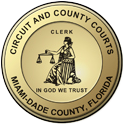
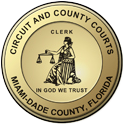
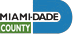

In [8]:
#Extract html elements
page = bs(driver.page_source, features='html.parser')
page

In [9]:
#Find the content
content = page.find_all('a',{'class':"btn btn-link pointer"})
content

[<a class="btn btn-link pointer" href='javascript:WebForm_DoPostBackWithOptions(new WebForm_PostBackOptions("ctl00$ContentPlaceHolder1$rptMultipleCitations$ctl00$ctl00", "", true, "", "", false, true))' title="View Citation Information1"><span class="fa fa-2x fa-info-circle"></span></a>,
 <a class="btn btn-link pointer" href='javascript:WebForm_DoPostBackWithOptions(new WebForm_PostBackOptions("ctl00$ContentPlaceHolder1$rptMultipleCitations$ctl01$ctl00", "", true, "", "", false, true))' title="View Citation Information2"><span class="fa fa-2x fa-info-circle"></span></a>,
 <a class="btn btn-link pointer" href='javascript:WebForm_DoPostBackWithOptions(new WebForm_PostBackOptions("ctl00$ContentPlaceHolder1$rptMultipleCitations$ctl02$ctl00", "", true, "", "", false, true))' title="View Citation Information3"><span class="fa fa-2x fa-info-circle"></span></a>,
 <a class="btn btn-link pointer" href='javascript:WebForm_DoPostBackWithOptions(new WebForm_PostBackOptions("ctl00$ContentPlaceHolder

In [10]:
#Get the info length
myinfo = []

for info in content:
    myinfo.append(info.get('href'))
    
print(len(myinfo), 'data')

4 data


In [22]:
#Loop to get the data
templist = []

for x in range(0, len(myinfo)):
    data = str(x+1)
    strSelector = "a[title*='View Citation Information"
    strSelectorEnd = "']"
    finalSelector = strSelector+data+strSelectorEnd
    driver.find_element_by_css_selector(finalSelector).click()
    

    status = driver.execute_script('return arguments[0].childNodes[5].textContent;', WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "span#lblCitationHeader")))).strip()
    total_due = driver.execute_script('return arguments[0].lastChild.textContent;', WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "span#lblCitationHeader")))).strip()
    issue_dept = driver.find_element_by_xpath('.//*[@id="form1"]/div[4]/div[9]/div/div/div[2]/table/tbody/tr[5]/td[2]').text
    lien_placed = driver.find_element_by_xpath('.//*[@id="lblLienPlaced"]').text

    driver.find_element_by_css_selector("a[id*='LinkButton1']").click()

    Table_dict = {
        'Status': status,
        'Total Due': total_due,
        'Issuing Department': issue_dept,
        'Lien_Placed': lien_placed
        }

    templist.append(Table_dict)
    df = pd.DataFrame(templist)

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  if __name__ == '__main__':
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  from ipykernel import kernelapp as app
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead


In [23]:
df

,Status,Total Due,Issuing Department,Lien_Placed
0,* DEPARTMENT CLOSED *,$0.00,05 ANIMAL SERVICES DEPARTMENT (305) 629-7387,
1,* DEPARTMENT CLOSED *,$0.00,05 ANIMAL SERVICES DEPARTMENT (305) 629-7387,
2,* DEPARTMENT CLOSED *,$0.00,05 ANIMAL SERVICES DEPARTMENT (305) 629-7387,
3,* DEPARTMENT CLOSED *,$0.00,05 ANIMAL SERVICES DEPARTMENT (305) 629-7387,


In [ ]:
driver.quit()

#### 1.6. Save data as csv

In [24]:
df.to_csv(os.getcwd() + "/CitationSearch/" + folio_number + ".csv")

### 2. Special Assessment

#### 2.1. Set Chromedriver paths

In [38]:
#Set Chromedriver Path
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.maximize_window()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


#### 2.2. Launch URLs and visit page

In [39]:
#Launch Url
driver.get('https://gisweb.miamidade.gov/SPTXLienLetters/')

In [40]:
#Close Pop-up
driver.find_element_by_xpath('//*[@id="divSplashScreenContent"]/table/tbody/tr[2]/td/div/div').click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


In [41]:
#Take data from config file
file = open('configsa.txt')
lines = file.readlines()
folio_number = lines[0]

In [42]:
#Find elements and take snapshots
elementID = driver.find_element_by_xpath('//*[@id="txtAddress"]')
elementID.send_keys(folio_number)

elementID = driver.find_element_by_xpath('//*[@id="tdDivAddress"]/table/tbody/tr/td[2]').click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  """


In [43]:
#Assign current window
current_windows = driver.current_window_handle
elementID = driver.find_element_by_xpath('//*[@id="trOtherAppLinks"]/td/div/span[1]/a').click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
#Switch to a new tab
all_handles = driver.window_handles
driver.switch_to.window(all_handles[1])
print('Switch to new tab has been successful.')

Switch to new tab has been successful.


In [45]:
#Get current browser
pdf_browser = driver.current_url
pdf_browser

'https://gisweb.miamidade.gov/SPTXLienLetters/ReportPage.aspx?folio=0131230371470&pSecurityGuardDistrict=&pStreetLightDistrict=&pMultiPurposeDistrict=&pMunicipalityForDistrict=MIAMI&pAddressForDistrict=1400%20NW%2044%20ST'

#### 2.3. Download the PDFs

In [47]:
download_path = os.getcwd() + '/SpecialAssessment/' + folio_number +'.pdf'
urllib.request.urlretrieve(pdf_browser, download_path)

('C:\\Users\\aviparna.biswas\\Python Projects\\Proplogix\\Web-Scraper/SpecialAssessment/0131230371470.pdf',
 <http.client.HTTPMessage at 0x1926287f788>)

#### 2.4. Take screenshot

In [48]:
#Switch back to initial page
all_handles = driver.window_handles
driver.switch_to.window(all_handles[0])
print('Switch to initial tab has been successful.')

Switch to initial tab has been successful.


In [49]:
driver.current_url

'https://gisweb.miamidade.gov/SPTXLienLetters/'

In [50]:
#Switch to a new tab
current_windows = driver.current_window_handle
elementID = driver.find_element_by_xpath('//*[@id="trOtherAppLinks"]/td/div/span[2]/a').click()
all_handles = driver.window_handles
driver.switch_to.window(all_handles[2])

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
#Check current url
web_browser = driver.current_url
web_browser

'https://www8.miamidade.gov/Apps/PA/PAOnlineTools/Taxes/NonAdvalorem.aspx?folio=0131230371470'

In [53]:
#Take screenshot
driver.find_element_by_tag_name('html').screenshot(os.getcwd() + "/SpecialAssessment/" + folio_number + ".png")

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_tag_name is deprecated. Please use find_element(by=By.TAG_NAME, value=name) instead
  


True

In [55]:
driver.quit()

### 3. Additional Code Enforcement

#### 3.1. Set Chromedriver Path

In [56]:
#Set Chromedriver Path
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.maximize_window()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


#### 3.2. Launch Urls and Visit Page

In [57]:
#Launch Url
driver.get('https://gisweb.miamidade.gov/CodeViolations/')

In [58]:
#Checking for splash-screen and removing it
try:
    wait = WebDriverWait(driver, 5)
    skipbutton = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="widgets_Splash_Widget_13"]/div[2]/div[2]/div[2]/button')))
    skipbutton.click()
    time.sleep(3)
except:
    print("Continue Button not present")

In [59]:
#Removing Pop-Up
start_process = driver.find_element_by_xpath('//*[@id="dijit__TemplatedMixin_1"]/div[1]/div').click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  


In [62]:
#Take data from config file
file = open('configace.txt')
lines = file.readlines()
folio_number = lines[0]

#Find elements and send keys
elementID = driver.find_element_by_xpath('//*[@id="esri_dijit_Search_0_input"]')
elementID.send_keys(folio_number)

#Searching for the data
driver.find_element_by_xpath('//*[@id="esri_dijit_Search_0"]/div/div[2]').click()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  import sys
C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  # This is added back by InteractiveShellApp.init_path()


#### 3.3. Take Snapshots

In [63]:
driver.execute_script("document.body.style.zoom='75%'")
driver.save_screenshot(os.getcwd() + "/AddnlCodeEnforcement/" + str(folio_number) + ".png")

True

In [64]:
driver.quit()

### 4. Tax Collection

#### 4.1. Set Chromedriver Path

In [4]:
#Set Chromedriver Path
driver = webdriver.Chrome('driver/chromedriver.exe')
driver.maximize_window()

C:\Users\aviparna.biswas\Anaconda3\envs\docuchief\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  


WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home
